In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [3]:
# Opening original .csv data set for manipulation
df = pd.read_csv("C:/Users/Owner/medical_clean212.csv")

In [4]:
# Data Exploration / Cleaning

In [5]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

array([[<Axes: title={'center': 'CaseOrder'}>,
        <Axes: title={'center': 'Zip'}>, <Axes: title={'center': 'Lat'}>,
        <Axes: title={'center': 'Lng'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'VitD_levels'}>,
        <Axes: title={'center': 'Doc_visits'}>],
       [<Axes: title={'center': 'Full_meals_eaten'}>,
        <Axes: title={'center': 'vitD_supp'}>,
        <Axes: title={'center': 'Initial_days'}>,
        <Axes: title={'center': 'TotalCharge'}>,
        <Axes: title={'center': 'Additional_charges'}>],
       [<Axes: title={'center': 'Item1'}>,
        <Axes: title={'center': 'Item2'}>,
        <Axes: title={'center': 'Item3'}>,
        <Axes: title={'center': 'Item4'}>,
        <Axes: title={'center': 'Item5'}>],
       [<Axes: title={'center': 'Item6'}>,
        <Axes: title={'center': 'Item7'}>,
 

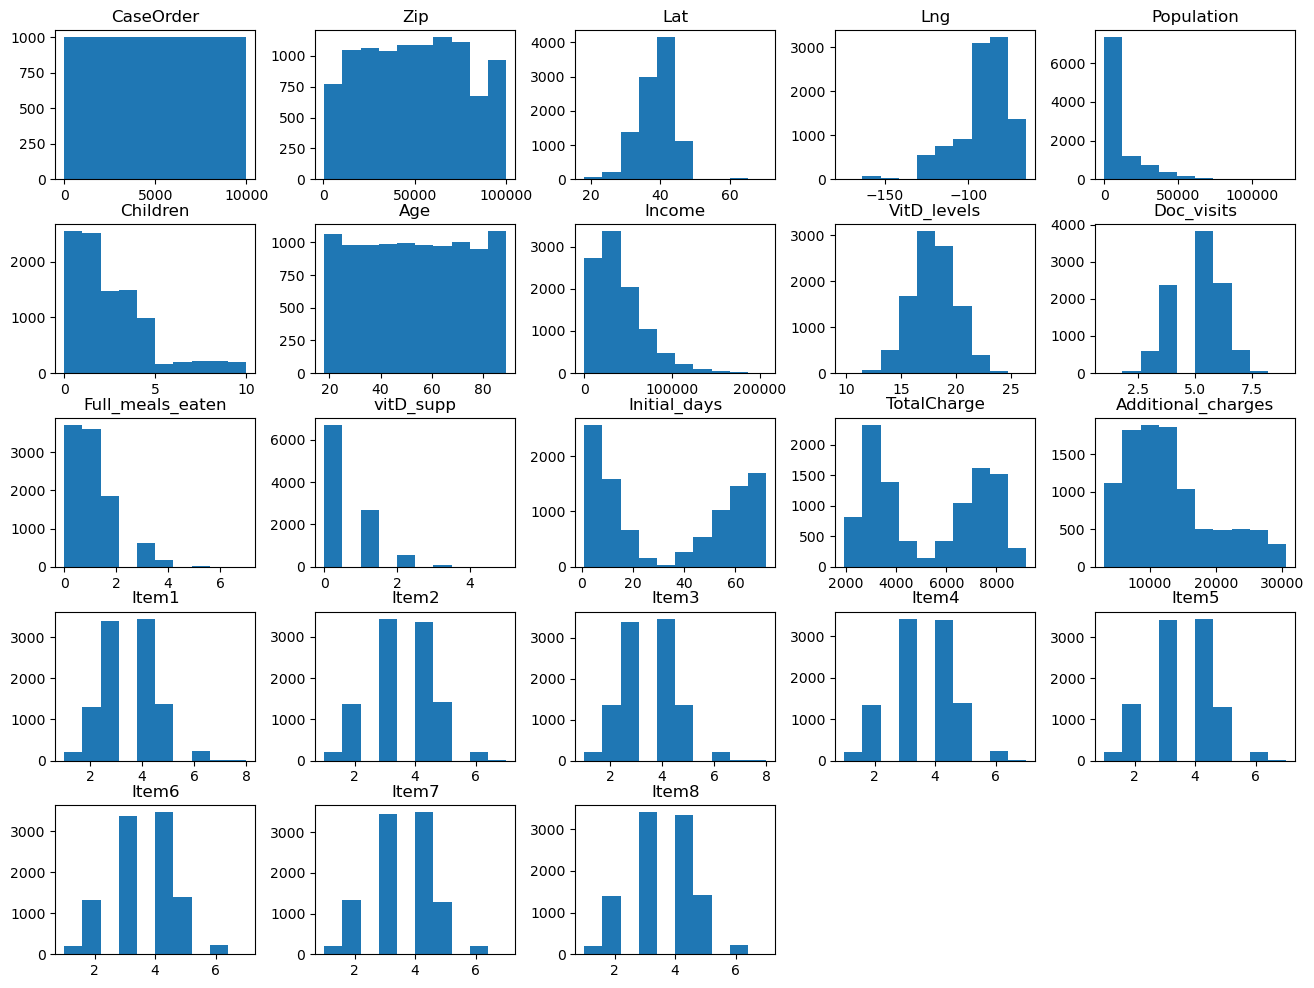

In [7]:
# Histograms of quantitative data
df.hist(grid=False, figsize=(16,12), layout=[5,5])

In [8]:
# Checking for missing data
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [9]:
# Checking for duplicates
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

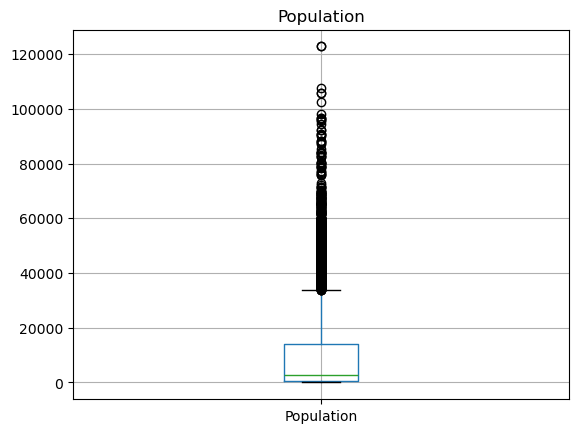

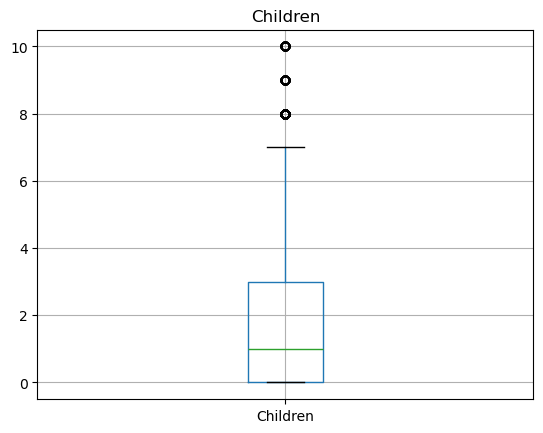

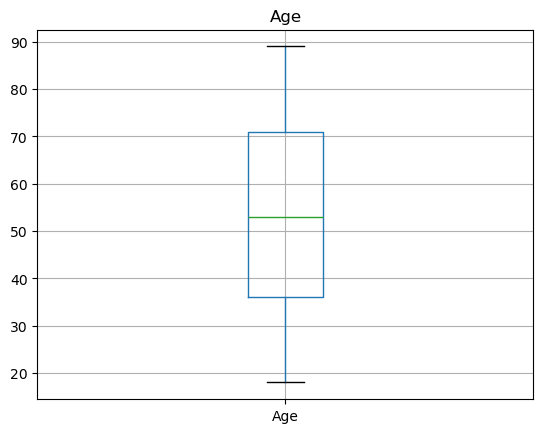

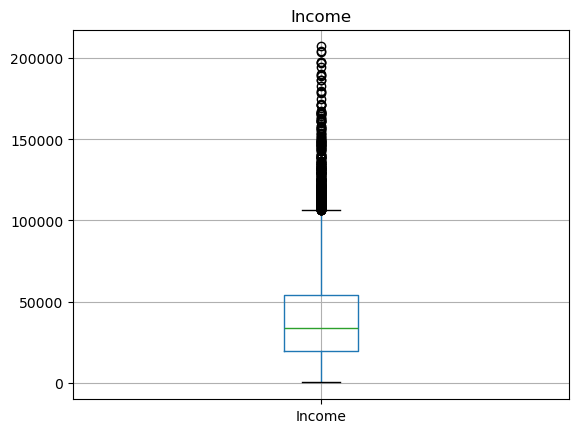

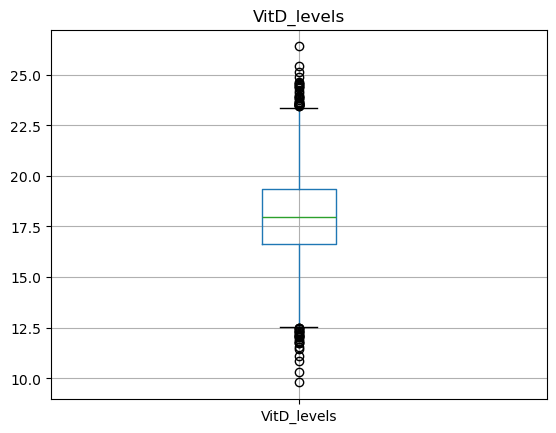

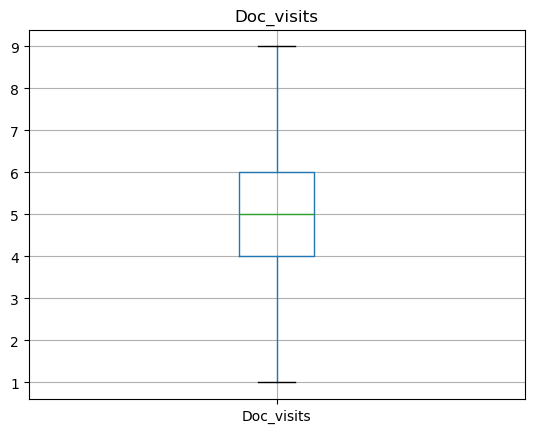

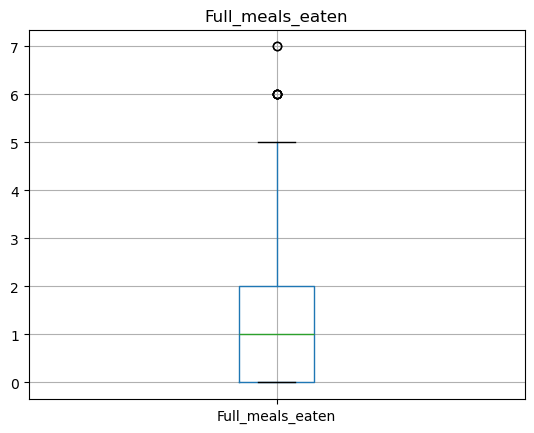

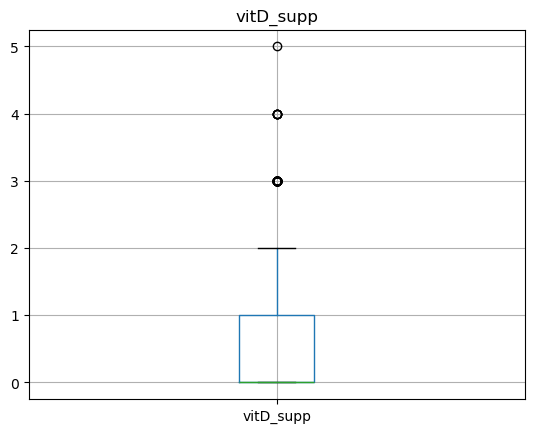

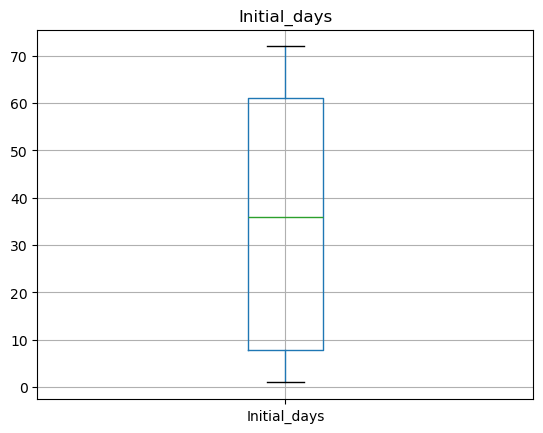

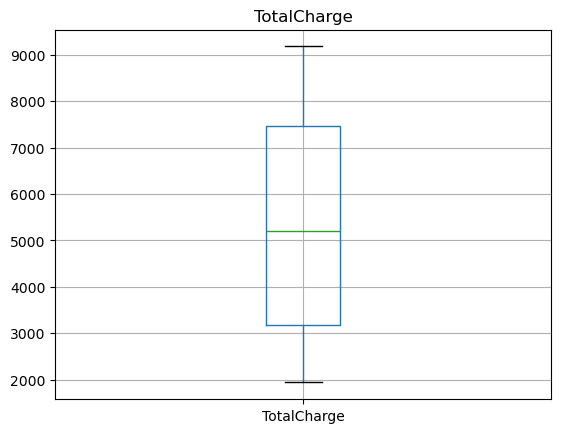

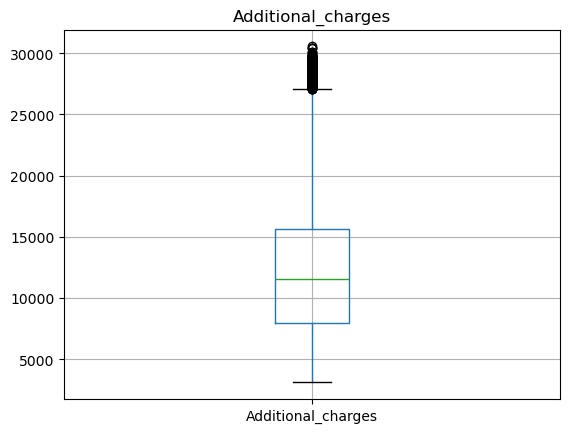

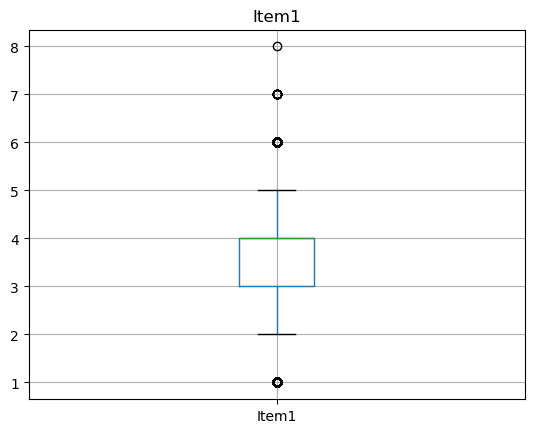

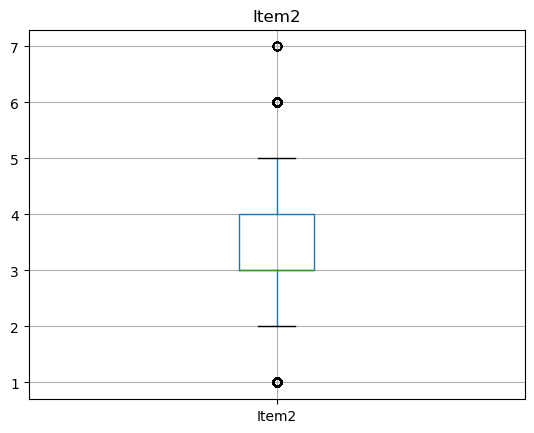

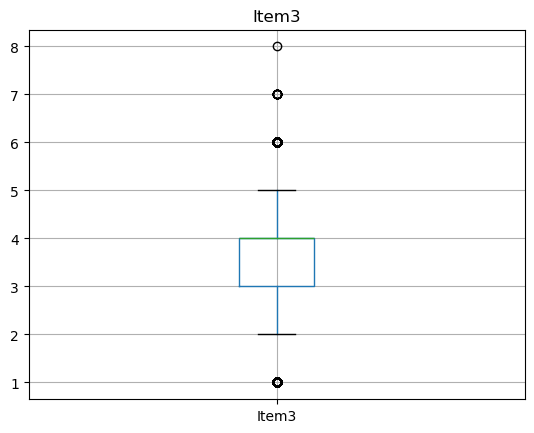

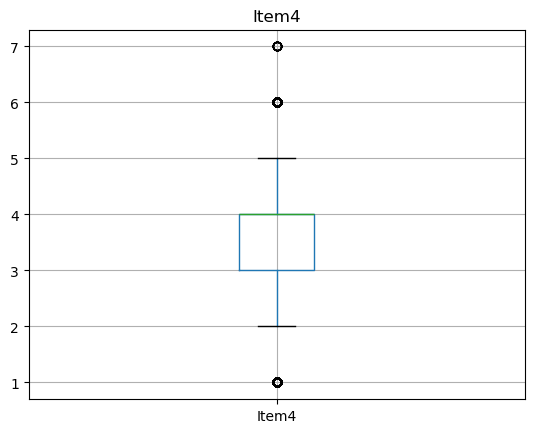

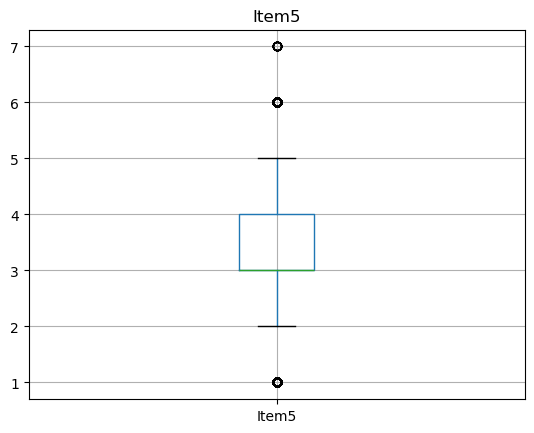

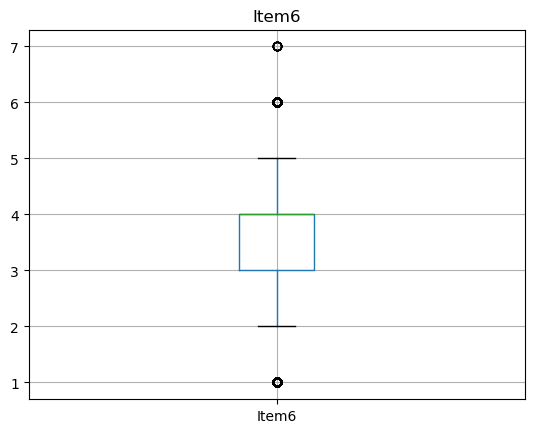

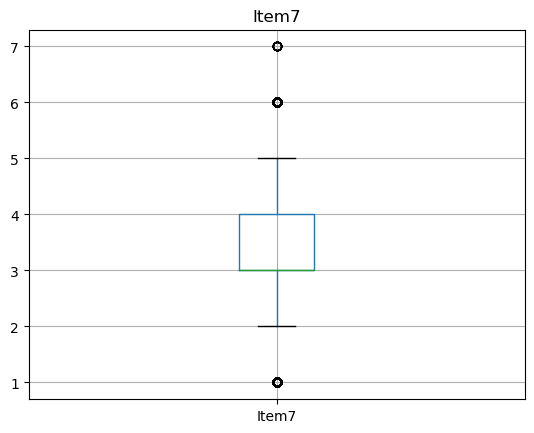

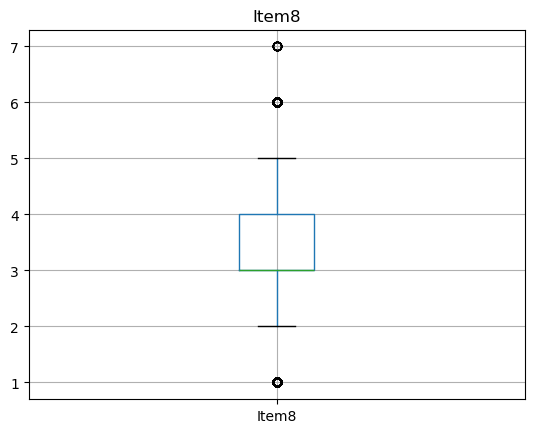

In [10]:
# Checking for outliers in quantitative variables

quant_columns = ['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


for column in df:
    if column in quant_columns:
        plt.figure()
        plt.gca().set_title(column)
        df.boxplot([column])

In [11]:
# Drop unneeded columns
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)


In [12]:
# Verify remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   VitD_levels         10000 non-null  float64
 4   Doc_visits          10000 non-null  int64  
 5   Full_meals_eaten    10000 non-null  int64  
 6   vitD_supp           10000 non-null  int64  
 7   Initial_days        10000 non-null  float64
 8   TotalCharge         10000 non-null  float64
 9   Additional_charges  10000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 781.4 KB


In [13]:
# Rename column to fit data dictionary
df = df.rename(columns={'vitD_supp': 'VitD_supp'})


In [14]:
# Remove outliers / replace with medians / round columns / recast as needed

In [15]:
# Children
df['Children'] = np.where(df['Children'] > 5, np.nan, df['Children'])
df['Children'].fillna(df['Children'].median(), inplace=True)
# Recast as int
df['Children'] = df['Children'].astype(int)

In [16]:
# Income
df['Income'] = np.where(df['Income'] > 97533, np.nan, df['Income'])
df['Income'].fillna(df['Income'].median(), inplace=True)
# Round
df['Income'] = df.Income.round(2)

In [17]:
# VitD_levels
df['VitD_levels'] = np.where(df['VitD_levels'] >= 22, np.nan, df['VitD_levels'])
df['VitD_levels'].fillna(df['VitD_levels'].median(), inplace=True)
# Round 
df['VitD_levels'] = df.VitD_levels.round(2)

In [18]:
# Full_meals_eaten
df['Full_meals_eaten'] = np.where(df['Full_meals_eaten'] > 3, np.nan, df['Full_meals_eaten'])
df['Full_meals_eaten'].fillna(df['Full_meals_eaten'].median(), inplace=True)
# Recast as int
df['Full_meals_eaten'] = df['Full_meals_eaten'].astype(int)

In [19]:
# Additional_charges
df['Additional_charges'] = np.where(df['Additional_charges'] > 27928, np.nan, df['Additional_charges'])
df['Additional_charges'].fillna(df['Additional_charges'].median(), inplace=True)
# Round
df['Additional_charges'] = df.Additional_charges.round(2)

In [20]:
# Round Initial_days
df['Initial_days'] = df.Initial_days.round(1)

In [21]:
# Round TotalCharge
df['TotalCharge'] = df.TotalCharge.round(2)

In [22]:
# Bivariate visual analysis of columns compared to Initial_days

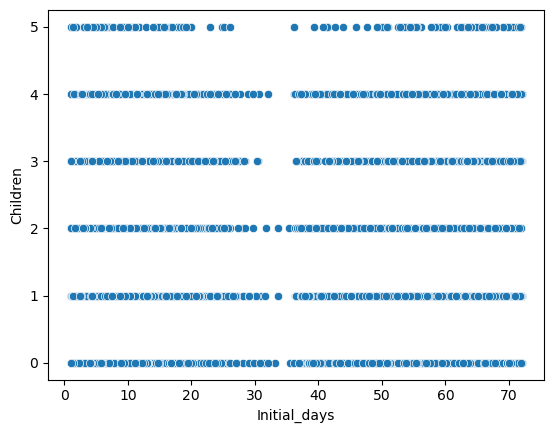

In [23]:
ax = seaborn.scatterplot(data = df, x = 'Initial_days', y = 'Children')

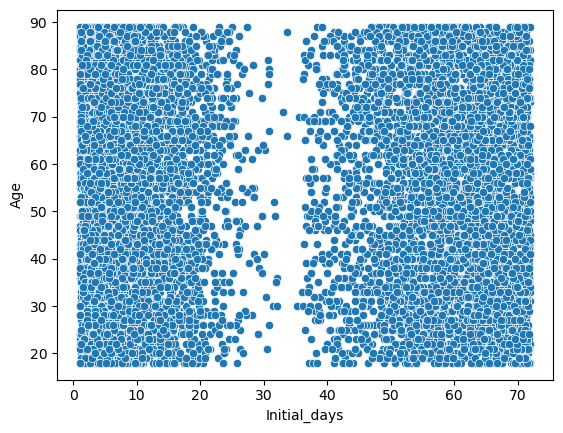

In [24]:
ax = seaborn.scatterplot(data = df, x = 'Initial_days', y = 'Age')

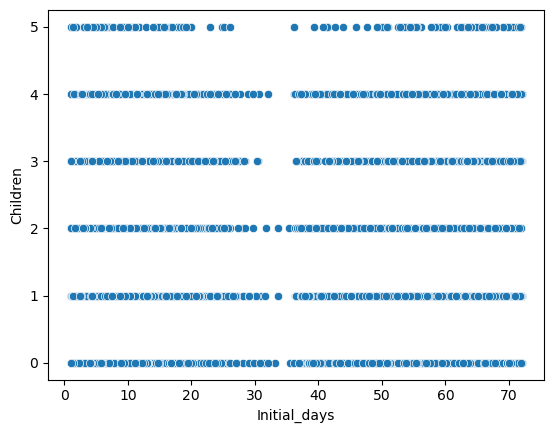

In [25]:
ax = seaborn.scatterplot(data = df, x = 'Initial_days', y = 'Children')

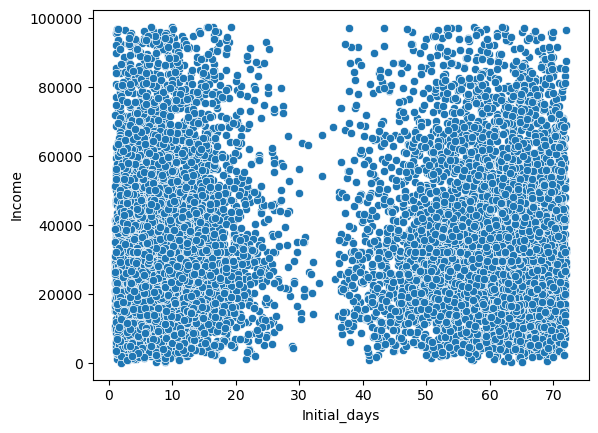

In [26]:
ax = seaborn.scatterplot(data = df, x = 'Initial_days', y = 'Income')

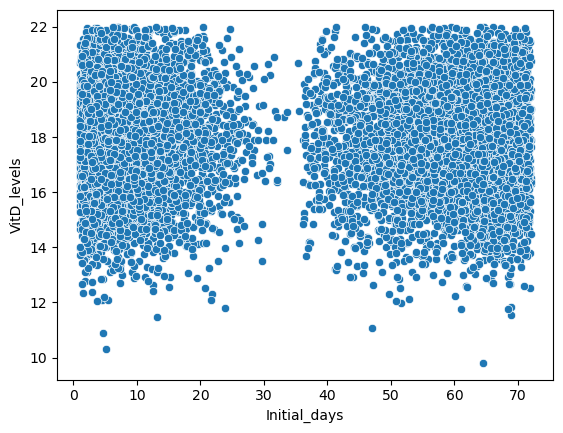

In [27]:
ax = seaborn.scatterplot(data = df, x = 'Initial_days', y = 'VitD_levels')

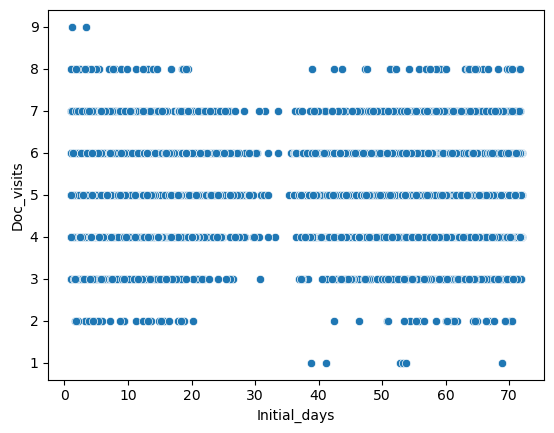

In [28]:
ax = seaborn.scatterplot(data = df, x = 'Initial_days', y = 'Doc_visits')

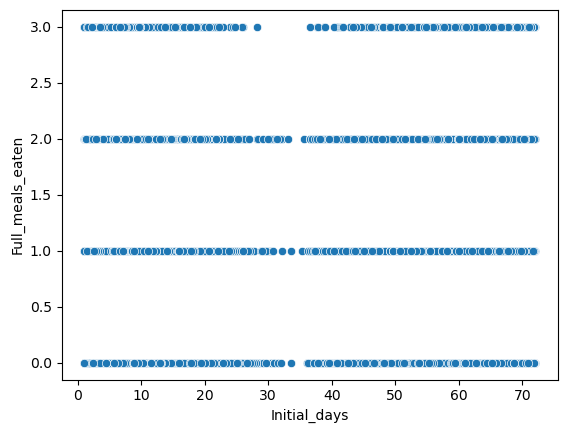

In [29]:
ax = seaborn.scatterplot(data = df, x = 'Initial_days', y = 'Full_meals_eaten')

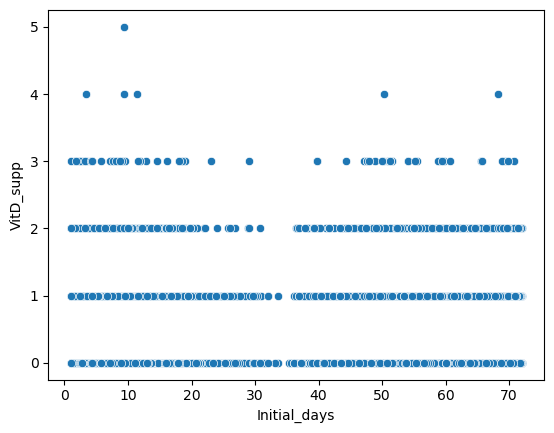

In [30]:
ax = seaborn.scatterplot(data = df, x = 'Initial_days', y = 'VitD_supp')

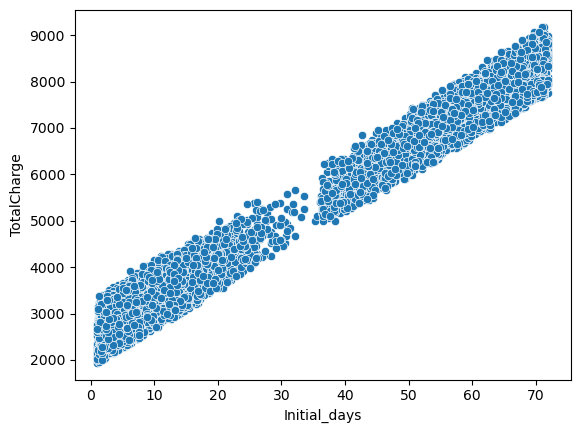

In [31]:
ax = seaborn.scatterplot(data = df, x = 'Initial_days', y = 'TotalCharge')

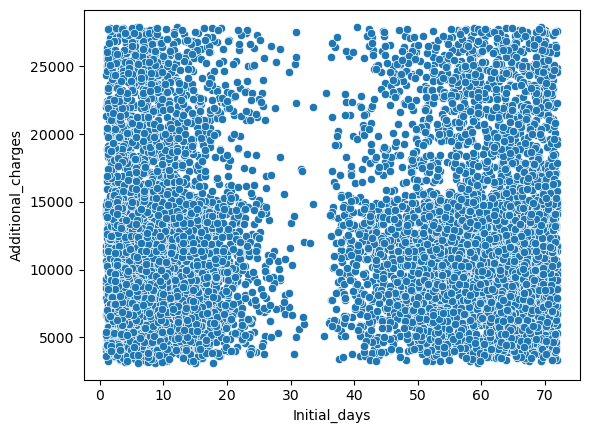

In [32]:
ax = seaborn.scatterplot(data = df, x = 'Initial_days', y = 'Additional_charges')

In [33]:
# Data Preprocessing via StandardScalar

In [34]:
scaler = StandardScaler()
prep_df = scaler.fit_transform(df)

In [35]:
prep_df = pd.DataFrame(prep_df, columns = df.columns)
prep_df

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Initial_days,TotalCharge,Additional_charges
0,-0.408779,-0.024795,2.317853,0.693952,0.944647,-1.048437,-0.634713,-0.906764,-0.727186,0.922912
1,1.060064,-0.121706,0.483076,0.586803,-0.967981,1.190617,0.956445,-0.735712,-0.513228,0.868133
2,1.060064,-0.024795,-1.013343,0.115350,-0.967981,0.071090,-0.634713,-1.127231,-1.319985,0.850040
3,-1.143201,1.186592,0.157158,-0.677550,-0.967981,0.071090,-0.634713,-1.245066,-1.460517,0.092849
4,-0.408779,-1.526914,-1.620503,-0.216811,-0.011667,-1.048437,2.547602,-1.260271,-1.467287,-1.464061
...,...,...,...,...,...,...,...,...,...,...
9995,0.325643,-1.381548,0.444398,-0.463253,-0.967981,1.190617,0.956445,0.651708,0.705764,-0.589499
9996,1.794486,1.622691,-0.985068,0.179639,-0.011667,-1.048437,-0.634713,1.301704,1.114312,-0.176923
9997,1.060064,-0.412438,1.364795,-0.382891,-0.967981,1.190617,-0.634713,1.358722,1.359596,0.476797
9998,1.060064,-0.509349,-0.305997,1.106474,-0.011667,1.190617,0.956445,1.100243,1.069726,-0.781822


In [36]:
prep_df.describe()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Initial_days,TotalCharge,Additional_charges
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,2.238210e-17,1.147527e-16,-1.570299e-16,-1.062261e-15,3.161915e-17,-1.136868e-17,3.694822e-17,-6.821210e-17,9.094947e-17,1.818989e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.143201e+00,-1.720736e+00,-1.669198e+00,-4.304529e+00,-3.836921e+00,-1.048437e+00,-6.347126e-01,-1.271674e+00,-1.547441e+00,-1.563218e+00
25%,-1.143201e+00,-8.485376e-01,-7.721216e-01,-6.521019e-01,-9.679806e-01,-1.048437e+00,-6.347126e-01,-1.009395e+00,-9.782198e-01,-7.474500e-01
50%,-4.087792e-01,-2.479466e-02,-1.853875e-01,2.427344e-02,-1.166703e-02,7.108996e-02,-6.347126e-01,5.302643e-02,-4.505043e-02,-1.769234e-01
75%,1.060064e+00,8.474037e-01,6.132437e-01,7.153817e-01,9.446465e-01,7.108996e-02,9.564446e-01,1.016618e+00,9.849756e-01,4.092517e-01
max,2.528908e+00,1.719602e+00,2.823176e+00,2.226177e+00,3.813587e+00,2.310144e+00,7.321074e+00,1.427142e+00,1.774336e+00,2.599014e+00


In [37]:
# Write to .csv file

In [38]:
df.to_csv('d212task1clean.csv', index=False)


In [39]:
# KMeans (Course materials, n.d.)

In [40]:
# Select columns to compare
prep_df = prep_df[['Initial_days', 'Additional_charges']]

In [41]:
# Verify dataframe
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Initial_days        10000 non-null  float64
 1   Additional_charges  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [42]:
# Create and fit KMeans model
first_model = KMeans(n_clusters = 3, n_init = 40, random_state = 49)
first_model.fit(prep_df)

KMeans(n_clusters=3, n_init=40, random_state=49)

In [43]:
# Evaluate model

In [44]:
pd.Series(first_model.labels_).value_counts()


0    4104
2    4072
1    1824
Name: count, dtype: int64

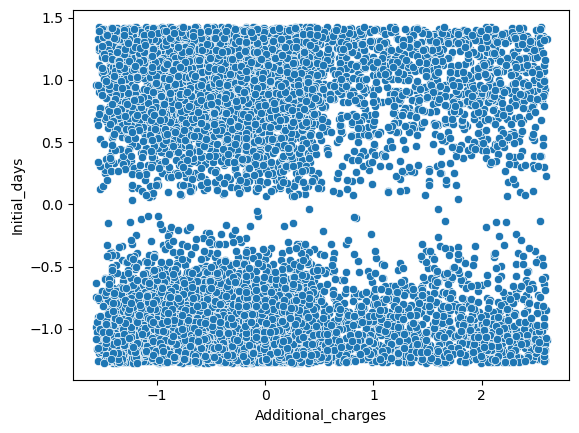

In [45]:
ax = seaborn.scatterplot(data=prep_df, x = 'Additional_charges', y = 'Initial_days')

In [46]:
# Create centroid

In [47]:
centeroid = pd.DataFrame(first_model.cluster_centers_, columns = prep_df.columns)
centeroid

,Initial_days,Additional_charges
0,0.967301,-0.373679
1,-0.028236,1.737468
2,-0.962010,-0.402179


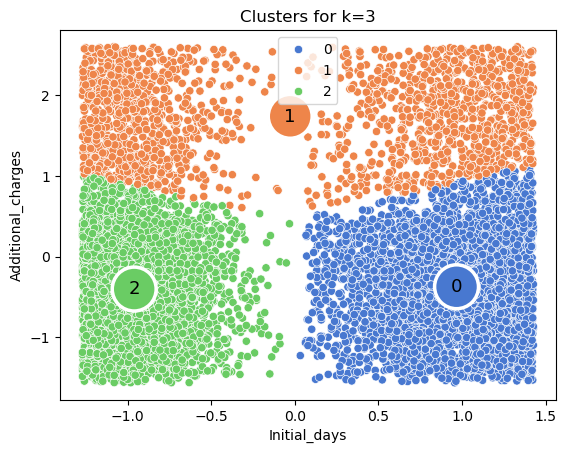

In [48]:
# Visualize centroids and data
plt.title('Clusters for k=3')
ax = seaborn.scatterplot(data = prep_df, x = 'Initial_days', y = 'Additional_charges', hue = first_model.labels_, palette = 'muted', legend = True)
ax = seaborn.scatterplot(data = centeroid, x = 'Initial_days', y = 'Additional_charges', hue = centeroid.index, palette = 'muted', s = 1000, legend = False)

for i in range(len(centeroid)):
    plt.text(x = centeroid.Initial_days[i], y = centeroid.Additional_charges[i], s = i, horizontalalignment = 'center', verticalalignment = 'center', size = 13, color = 'black')



In [49]:
# 2 Ways of finding optimal k

In [50]:
# Within Cluster Sum of Squares

Text(0.5, 1.0, 'WCSS Graph for Optimal k')

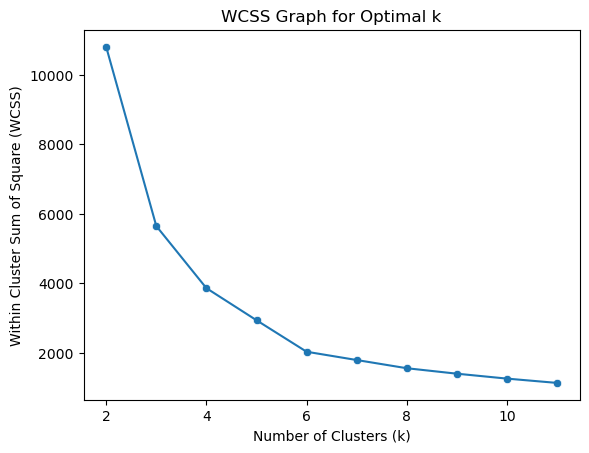

In [51]:
wcss = []
for k in range (2, 12):
    wcss_model = KMeans(n_clusters = k, random_state = 251)
    wcss_model.fit(prep_df)
    wcss.append(wcss_model.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 12))


ax = seaborn.lineplot(y = wcss_series, x = wcss_series.index)
ax = seaborn.scatterplot(y = wcss_series, x = wcss_series.index)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Cluster Sum of Square (WCSS)')
plt.title('WCSS Graph for Optimal k')

In [52]:
# Silhouette Score (-1 - +1, where 1 is best)

In [53]:
sil_score = silhouette_score(prep_df, first_model.labels_)
print('Average Silhouette Score: ', sil_score)

Average Silhouette Score:  0.5477002401580557


In [54]:
# Average sil score and optimal clusters visual

Text(0.5, 1.0, 'Silhouette Score Graph for Optimal k')

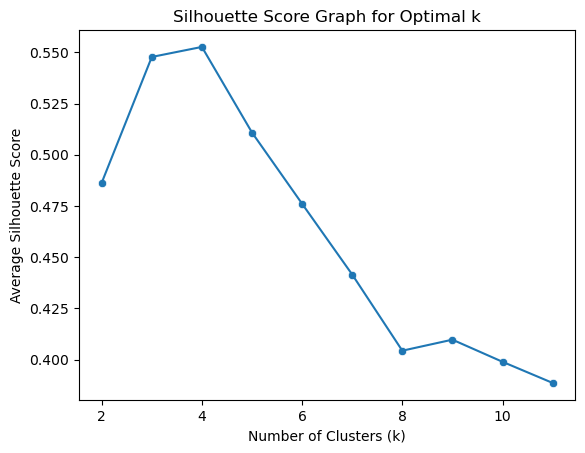

In [55]:
sil_obj = []
for k in range(2, 12):
    sil_model = KMeans(n_clusters = k, random_state = 173)
    sil_model.fit(prep_df)
    sil_obj.append(silhouette_score(prep_df, sil_model.labels_))
    
sil_series = pd.Series(sil_obj, index = range(2, 12))

ax = seaborn.lineplot(y = sil_series, x = sil_series.index)
ax = seaborn.scatterplot(y = sil_series, x = sil_series.index)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score Graph for Optimal k')

In [56]:
# Analysis with optimal k (k=4)

In [57]:
optimal = KMeans(n_clusters = 4, random_state = 133)
optimal.fit(prep_df)

KMeans(n_clusters=4, random_state=133)

In [58]:
# Eval
pd.Series(optimal.labels_).value_counts()

1    3925
0    3905
3    1093
2    1077
Name: count, dtype: int64

In [59]:
# Create centeroid for graph
centeroid = pd.DataFrame(optimal.cluster_centers_, columns = prep_df.columns)
centeroid

,Initial_days,Additional_charges
0,-0.958886,-0.451053
1,0.960440,-0.426356
2,0.951723,1.586337
3,-0.960909,1.577598


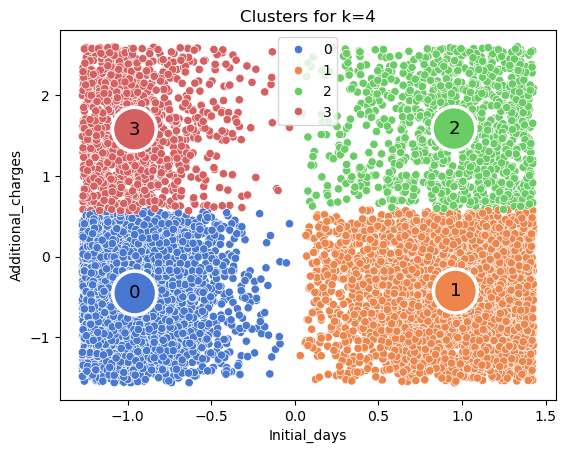

In [60]:
# Cluster graph for optimal k

plt.title('Clusters for k=4')
ax = seaborn.scatterplot(data = prep_df, x = 'Initial_days', y = 'Additional_charges', hue = optimal.labels_, palette = 'muted', legend = True)
ax = seaborn.scatterplot(data = centeroid, x = 'Initial_days', y = 'Additional_charges', hue = centeroid.index, palette = 'muted', s = 1000, legend = False)

for i in range(len(centeroid)):
    plt.text(x = centeroid.Initial_days[i], y = centeroid.Additional_charges[i], s = i, horizontalalignment = 'center', verticalalignment = 'center', size = 13, color = 'black')

In [61]:
# Silhouette score for optimal model
sil_score = silhouette_score(prep_df, optimal.labels_)
print('Average Silhouette Score: ', sil_score)

Average Silhouette Score:  0.5526144906746026
